In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os
import json
s = json.load(open(os.getenv('PUI2015')+'/plotstyle.json'))
plt.rcParams.update(s)
%matplotlib inline

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [22]:
# have a quick look at the data
path = '/Users/eliseowang/Documents/AppliedDataScience/project/sh_test.csv'
data = pd.read_csv(path)
print data.head()
data.describe()

             genCategory             category  \
0     Travel & Transport                Hotel   
1                    NaN  Szechuan Restaurant   
2  Outdoors & Recreation          Golf Course   
3         Shop & Service    Electronics Store   
4                   Food  Japanese Restaurant   

                                 name         lon        lat  checkIns  tips  \
0  上海天禧嘉福酒店 Skyfortune Boutique Hotel  121.390842  31.183345       217     3   
1                               四川香天下  121.392031  31.183549         9     0   
2         Hongqiao Golf Driving range  121.386053  31.187153       169     3   
3                             蘇寧電器吳中路  121.389871  31.182312        10     0   
4                              龙之介炉端烧  121.387928  31.182557       120     1   

   users    createdAt         tileID                        ID  \
0    136  2011.09.21   0_00_00_00_10  4e79a8e88877bac8d1cbbfbd   
1      3  2015.08.01   0_00_00_00_10  55bcad8a498e6bfc6d59ee71   
2     82  2012.04.02   0_0

,lon,lat,checkIns,tips,users,verified,price,rating,photoCount
count,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075,10075.000000,10075.000000,10075.000000
mean,121.460175,31.227608,171.302333,2.006253,69.733499,0.0179653,-0.995136,-0.177945,14.489330
std,0.047124,0.036851,729.115512,8.403823,314.768264,0.132832,0.132463,2.485988,114.298239
min,121.383820,31.170800,0.000000,0.000000,0.000000,False,-1.000000,-1.000000,-17.000000
25%,121.422460,31.199055,2.000000,0.000000,1.000000,0,-1.000000,-1.000000,0.000000
50%,121.451998,31.224647,6.000000,0.000000,4.000000,0,-1.000000,-1.000000,0.000000
75%,121.500624,31.249591,35.000000,0.000000,13.000000,0,-1.000000,-1.000000,2.000000
max,121.548538,31.316262,23272.000000,184.000000,10032.000000,True,3.000000,9.500000,8195.000000


We are assuming the users of 4square are homogeneous group of people with similar behaviors. Foursquare users are considered sensors around the world, reflecting the data.

## See what the unique categories are (in alphabetical order)

In [3]:
catValues = sorted(data['genCategory'].unique())
catValues

[nan,
 'Arts & Entertainment',
 'College & University',
 'Event',
 'Food',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Travel & Transport']

## Create a categorical value for each category string (not necessary but just in case you need it in your column)

In [4]:
# create a dictionary of string-int pair.
unique = {catValues[i]:i for i in range(len(catValues))}
# set the numerical value of NaNs to np.nan
unique[np.nan] = np.nan
unique

{nan: nan,
 'Arts & Entertainment': 1,
 'College & University': 2,
 'Event': 3,
 'Food': 4,
 'Nightlife Spot': 5,
 'Outdoors & Recreation': 6,
 'Professional & Other Places': 7,
 'Residence': 8,
 'Shop & Service': 9,
 'Travel & Transport': 10}

In [5]:
# transform the dic into a dataframe
cateValues = pd.DataFrame(unique, 
                      index=[1]).T.reset_index().rename(columns={'index':'genCategory',
                                                                 1:'CateValue'})
cateValues

,genCategory,CateValue
0,NaN,NaN
1,Arts & Entertainment,1
2,College & University,2
3,Event,3
4,Food,4
5,Nightlife Spot,5
6,Outdoors & Recreation,6
7,Professional & Other Places,7
8,Residence,8
9,Shop & Service,9


In [6]:
# give pair the genCategory of each row with the corresponding categorical value
data2 = data.merge(cateValues, how='left', on='genCategory')
print data2.shape
data2.head()

(10075, 20)


,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description,CateValue
0,Travel & Transport,Hotel,上海天禧嘉福酒店 Skyfortune Boutique Hotel,121.390842,31.183345,217,3,136,2011.09.21,0_00_00_00_10,4e79a8e88877bac8d1cbbfbd,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,23,NaN,10
1,NaN,Szechuan Restaurant,四川香天下,121.392031,31.183549,9,0,3,2015.08.01,0_00_00_00_10,55bcad8a498e6bfc6d59ee71,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,1,NaN,NaN
2,Outdoors & Recreation,Golf Course,Hongqiao Golf Driving range,121.386053,31.187153,169,3,82,2012.04.02,0_00_00_00_10,4f79acbfe4b0795c3a0102d6,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,12,NaN,6
3,Shop & Service,Electronics Store,蘇寧電器吳中路,121.389871,31.182312,10,0,6,2013.01.06,0_00_00_00_10,50e91cfae4b09c384603f0fa,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,2,NaN,9
4,Food,Japanese Restaurant,龙之介炉端烧,121.387928,31.182557,120,1,51,2010.08.20,0_00_00_00_10,4c6e686c65eda093bd4251d0,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,8,NaN,4


## Clean the data a little bit. Take checkIn No. larger than 10.

In [7]:
data3 = data2[(data2['users'] >= 100) &
              (data2['checkIns'] >= 100) &
              (data2['CateValue'] != np.nan)]

In [8]:
print data3.shape
data3.head()

(1075, 20)


,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description,CateValue
0,Travel & Transport,Hotel,上海天禧嘉福酒店 Skyfortune Boutique Hotel,121.390842,31.183345,217,3,136,2011.09.21,0_00_00_00_10,4e79a8e88877bac8d1cbbfbd,China_Shanghai,2015.11.08 22:54:55,False,-1,-1.0,NaN,23,NaN,10
91,Shop & Service,Mall,光启城 | Sunny Days City,121.423193,31.186215,1725,4,515,2012.05.09,0_00_00_01_11,4fa9ebdbe4b0afe1f1cd2b04,China_Shanghai,2015.11.08 22:55:50,False,-1,5.5,NaN,54,NaN,9
92,Travel & Transport,Metro Station,宜山路地铁站 | Yishan Rd. Metro Stn.,121.422658,31.188354,2652,5,601,2010.02.22,0_00_00_01_11,4b82498cf964a52016cf30e3,China_Shanghai,2015.11.08 22:55:50,False,-1,-1.0,metro line 3;metro line 4;metro line 9;metro s...,47,NaN,10
94,Shop & Service,Mall,Carrefour | 家乐福,121.423305,31.186000,322,3,159,2012.08.13,0_00_00_01_11,5028928be4b004413ab8b0b1,China_Shanghai,2015.11.08 22:55:50,False,-1,5.4,NaN,15,NaN,9
100,Food,American Restaurant,Laya Burger,121.421776,31.183936,159,6,107,2012.12.16,0_00_00_01_11,50cd5eebe4b03ff341662aac,China_Shanghai,2015.11.08 22:55:51,False,-1,5.5,NaN,24,NaN,4


## Plot all the general categories on the same figure using different colors for each category.

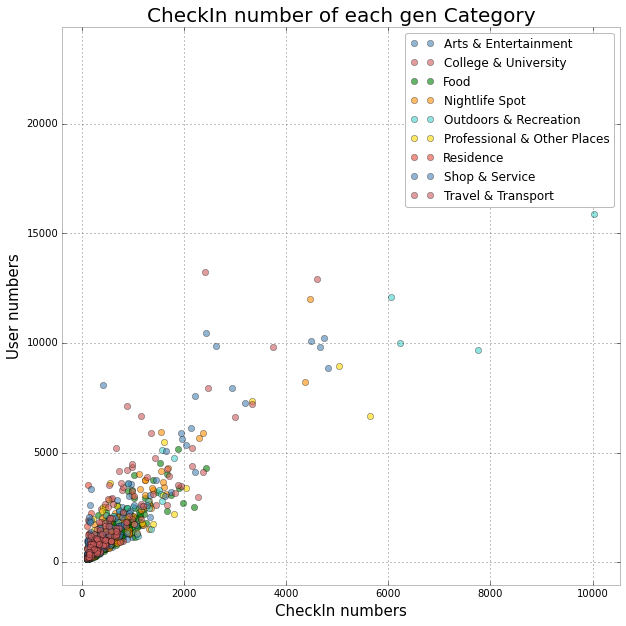

In [9]:
# group the data by general category
groups = data3.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(group.users, group.checkIns, marker='o',
            linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('User numbers', fontsize=15)
ax.set_xlabel('CheckIn numbers', fontsize=15)
ax.set_title('CheckIn number of each gen Category', fontsize=20)
ax.legend()

## Plot at log scale

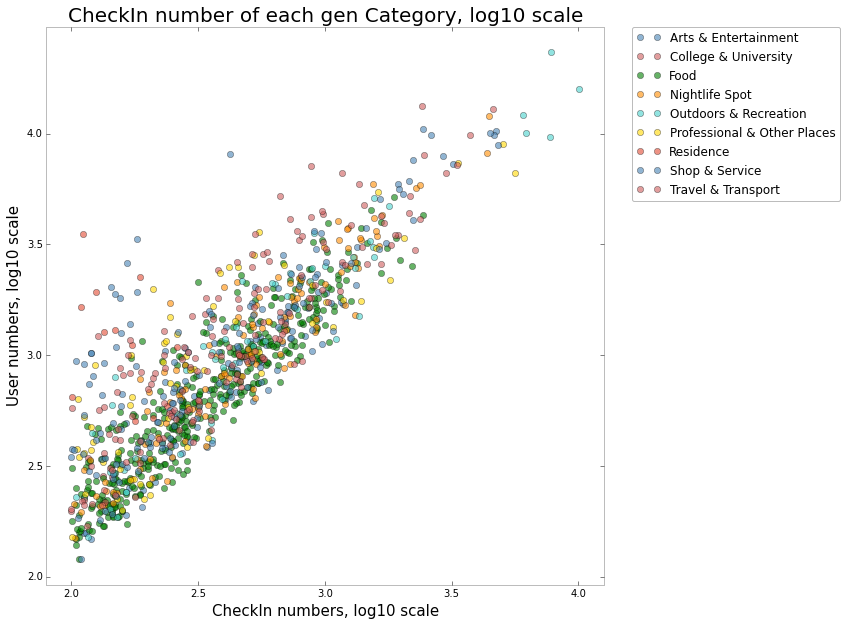

In [10]:
# group the data by general category
groups = data3.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(np.log10(group.users), np.log10(group.checkIns), marker='o',
            linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('User numbers, log10 scale', fontsize=15)
ax.set_xlabel('CheckIn numbers, log10 scale', fontsize=15)
ax.set_title('CheckIn number of each gen Category, log10 scale', fontsize=20)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

## plot each general category on a different figure

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


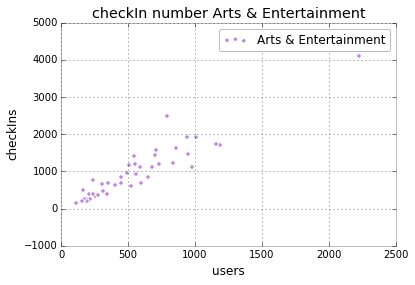

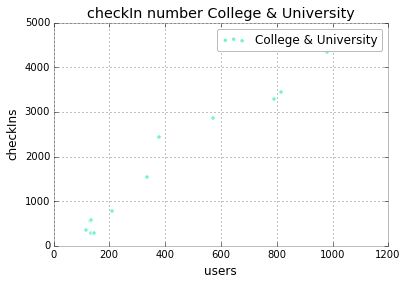

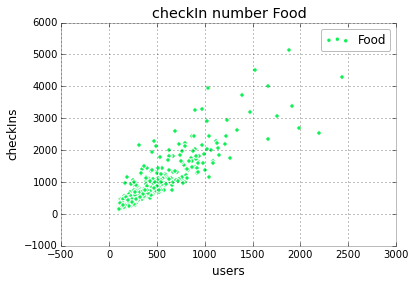

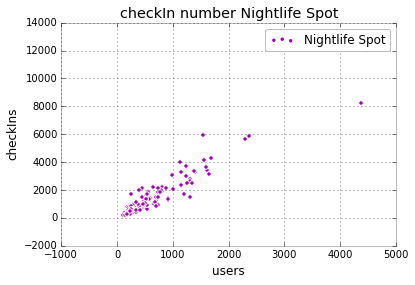

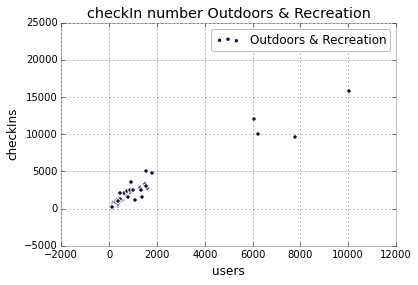

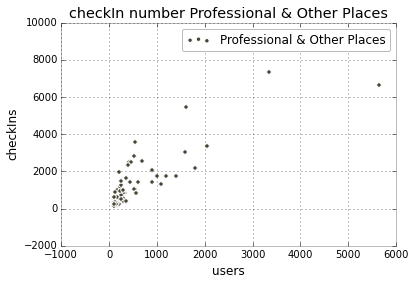

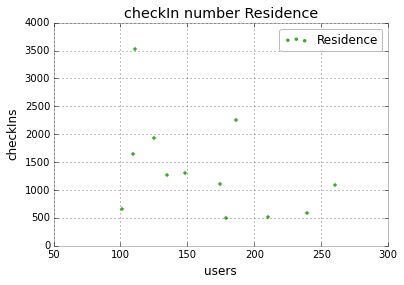

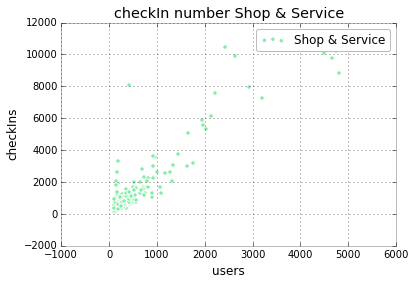

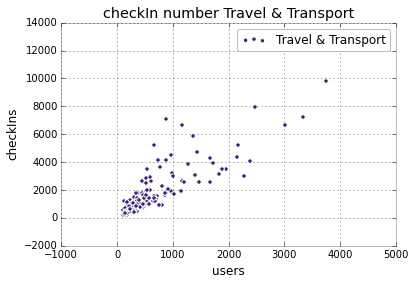

In [11]:
np.random.seed(2015)
# create a 10 * 10 figure
fig1  = plt.figure(figsize=(10,10))
for name, group in groups:
    group.plot(x = 'users', y = 'checkIns', 
               kind = 'scatter',color = np.random.rand(3),
               label = name, 
               title = 'checkIn number %s' %name,
               fontsize = 10)

## Plot each figure separately at log level

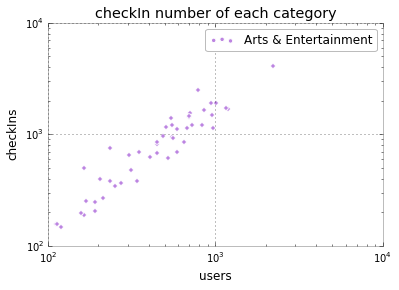

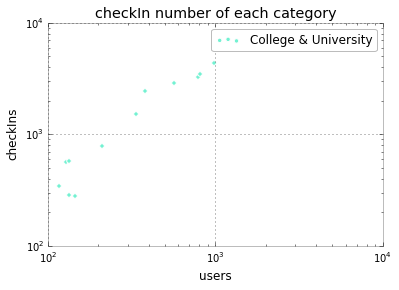

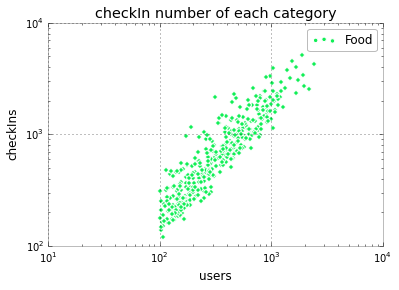

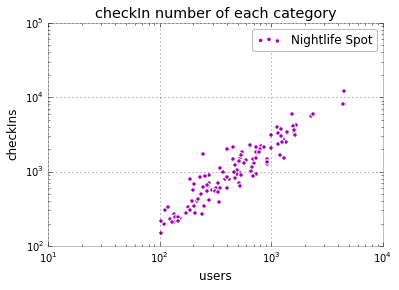

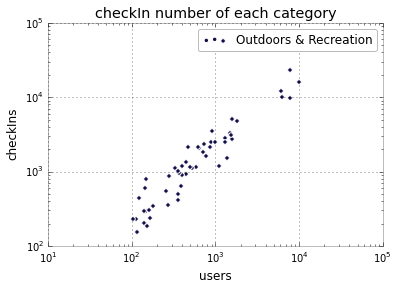

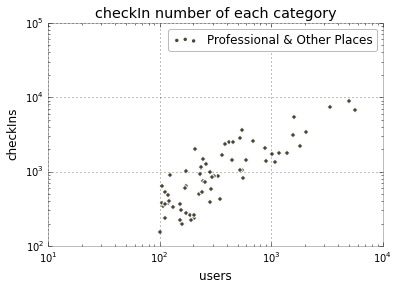

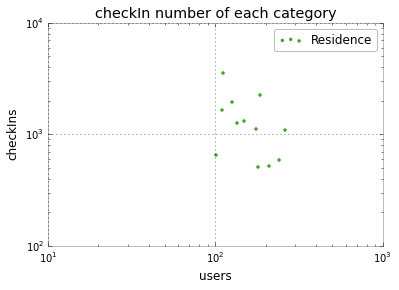

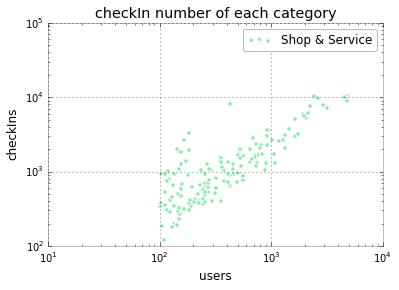

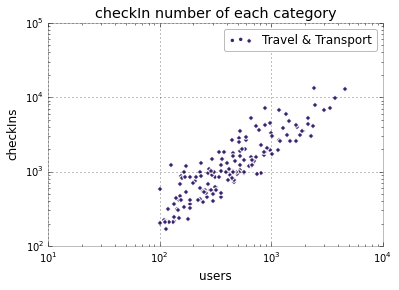

In [12]:
np.random.seed(2015)
# create a 10 * 10 figure
fig1= plt.figure(figsize=(10,10))
for name, group in groups:
    group.plot(x = 'users', y = 'checkIns',
               kind = 'scatter',color = np.random.rand(3),
               label = name, loglog = True,
               title = 'checkIn number of each category',
               fontsize = 10)

In [13]:
# run a linear regression (without intercept) for the data
lm = smf.ols(formula='Y ~ X - 1',
             data={'Y':data3.checkIns,
                   'X':data3.users}).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     6742.
Date:                Fri, 13 Nov 2015   Prob (F-statistic):               0.00
Time:                        00:12:55   Log-Likelihood:                -8767.4
No. Observations:                1075   AIC:                         1.754e+04
Df Residuals:                    1074   BIC:                         1.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              2.1423      0.026     82.109      0.000         2.091     2.193
==============================================================================
Omnibus:                      598.209   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35500.252
Skew:                           1.772   Prob(JB):                         0.00
Kurtosis:                      30.929   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the regression line for the whole dataset

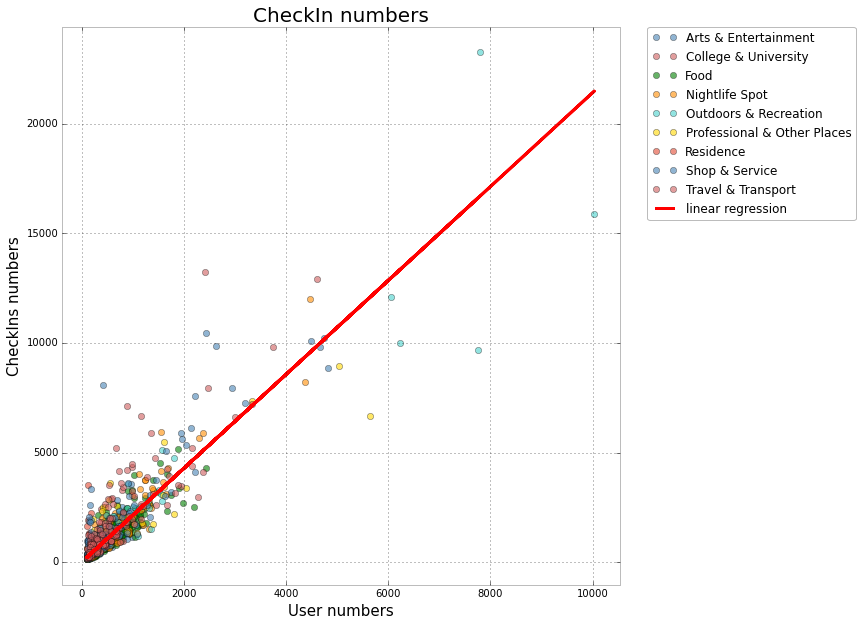

In [14]:
# group the data by general category
groups = data3.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(group.users, group.checkIns, marker='o',
            linestyle='', ms=6, alpha=.6, label=name )
plt.plot(data3.users, lm.predict(), color='r', lw=3, label='linear regression')
ax.set_xlabel('User numbers', fontsize = 15)
ax.set_ylabel('CheckIns numbers', fontsize = 15)
ax.set_title('CheckIn numbers', fontsize = 20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.legend(numpoints=1) 

## Run and plot regression line for the whole dataset at log scale

In [15]:
lm1 = smf.ols(formula='Y ~ X - 1',
             data={'Y':np.log10(data3.checkIns),
                   'X':np.log10(data3.users)}).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.145e+05
Date:                Fri, 13 Nov 2015   Prob (F-statistic):               0.00
Time:                        00:12:56   Log-Likelihood:                 159.06
No. Observations:                1075   AIC:                            -316.1
Df Residuals:                    1074   BIC:                            -311.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              1.1314      0.002    463.183      0.000         1.127     1.136
==============================================================================
Omnibus:                      308.068   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.845
Skew:                           1.441   Prob(JB):                    8.02e-195
Kurtosis:                       6.412   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

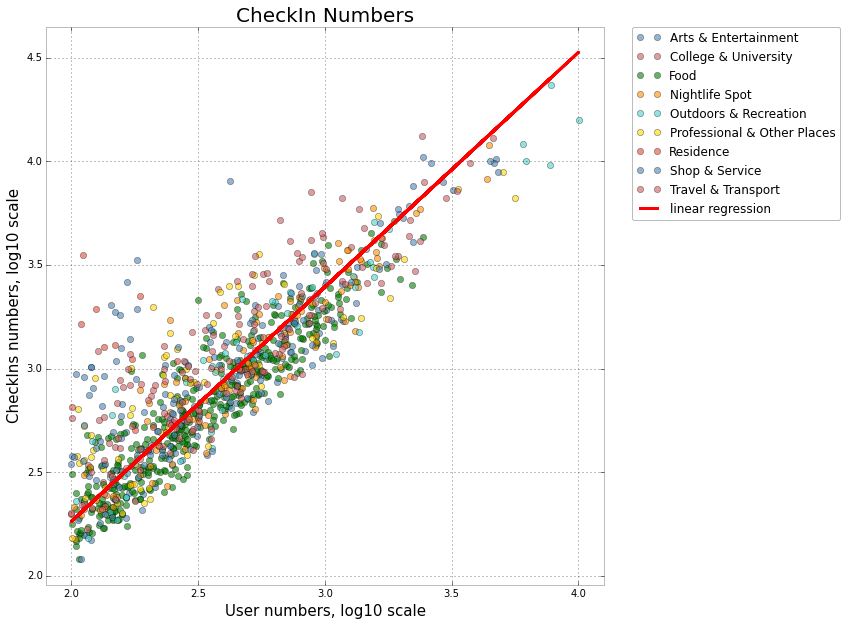

In [16]:
# group the data by general category
groups = data3.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(np.log10(group.users), np.log10(group.checkIns),
            marker='o',linestyle='', ms=6, 
            alpha=.6, label=name )
plt.plot(np.log10(data3.users), lm1.predict(), color='r', lw=3, label='linear regression')
ax.set_xlabel('User numbers, log10 scale', fontsize = 15)
ax.set_ylabel('CheckIns numbers, log10 scale', fontsize = 15)
ax.set_title('CheckIn Numbers', fontsize = 20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Run a linear regression for each category and plot them separately

Arts & Entertainment
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     960.1
Date:                Fri, 13 Nov 2015   Prob (F-statistic):           6.24e-33
Time:                        00:12:57   Log-Likelihood:                -334.74
No. Observations:                  48   AIC:                             671.5
Df Residuals:                      47   BIC:                             673.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              1.7739      0.05

/Users/eliseowang/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


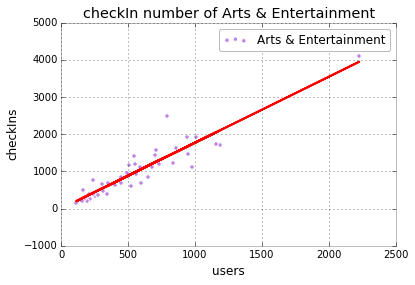

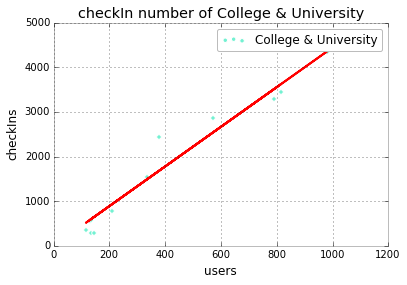

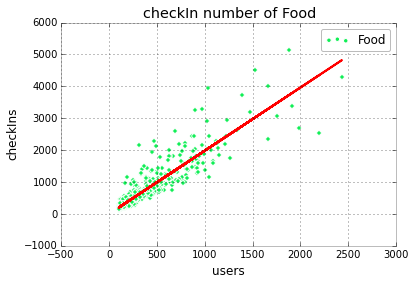

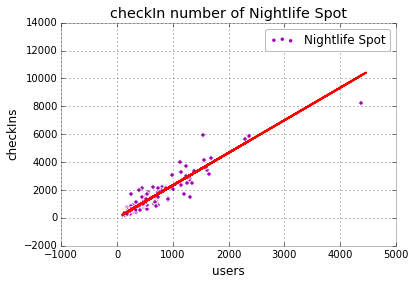

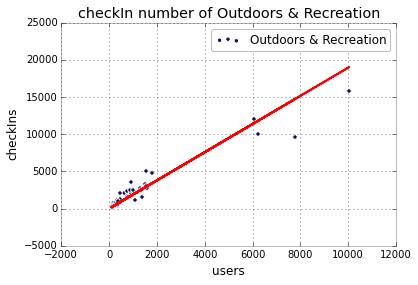

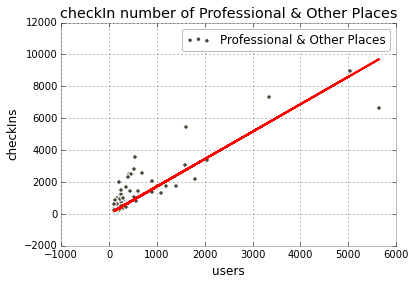

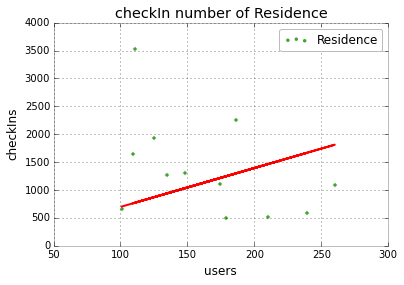

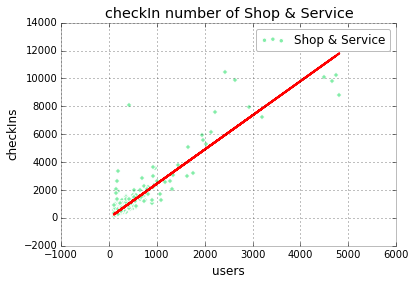

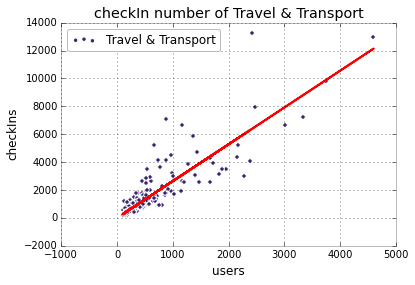

In [17]:
np.random.seed(2015)
lmE = {}
# create a 10 * 10 figure
fig1= plt.figure(figsize=(10,10))
for name, group in groups:
    lmE['%s'%name[:3]] = smf.ols(formula='Y ~ X - 1', 
                                 data={'Y':group.checkIns, 
                                       'X':group.users}).fit()
    group.plot(x='users', y='checkIns', 
               kind='scatter',color=np.random.rand(3),
               label=name, title='checkIn number of %s'%name,
               fontsize=10)
    plt.plot(group.users, lmE['%s'%name[:3]].predict(),
             color='r', lw=2, label='linear regression')
    print '%s' %name
    print lmE['%s'%name[:3]].summary()
    print '\n'

Arts & Entertainment
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.025e+04
Date:                Fri, 13 Nov 2015   Prob (F-statistic):           1.11e-67
Time:                        00:12:59   Log-Likelihood:                 36.446
No. Observations:                  48   AIC:                            -70.89
Df Residuals:                      47   BIC:                            -69.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              1.0848      0.00

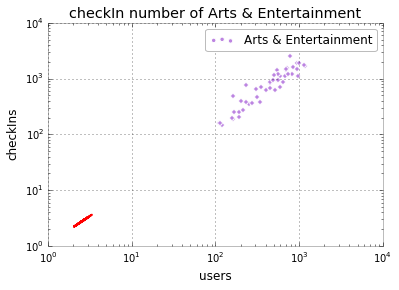

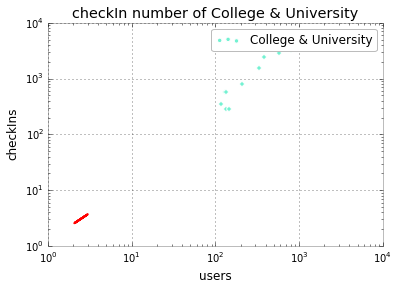

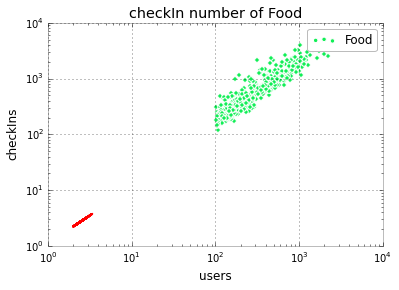

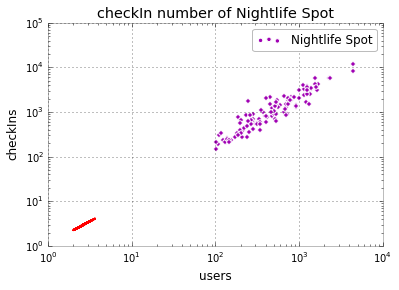

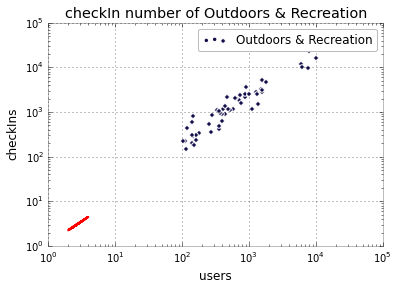

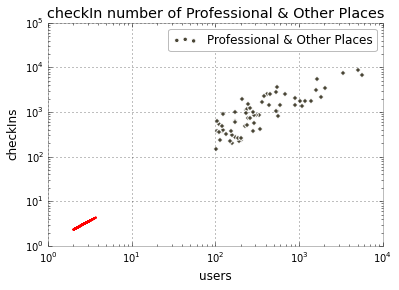

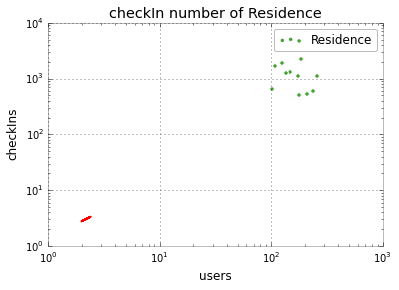

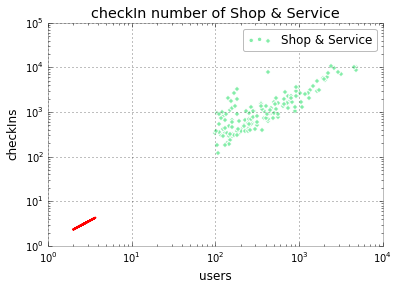

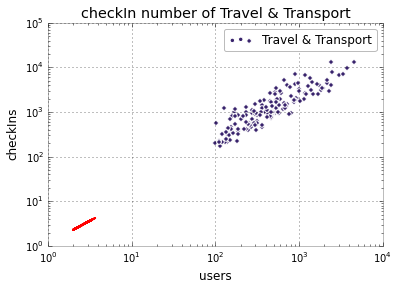

In [18]:
np.random.seed(2015)
lmL = {}
# create a 10 * 10 figure
fig1= plt.figure(figsize = (10,10))
for name, group in groups:
    lmL['%s'%name[:3]] = smf.ols(formula='Y ~ X - 1', 
                                 data={'Y':np.log10(group.checkIns), 
                                       'X':np.log10(group.users)}).fit()
    group.plot(x='users', y='checkIns', loglog= True,
               kind='scatter', color=np.random.rand(3),
               label=name, title='checkIn number of %s'%name,
               fontsize=10)
    plt.plot(np.log10(group.users), lmL['%s'%name[:3]].predict(),
             color='r', lw=2, label='linear regression')
    print '%s' %name
    print lmL['%s'%name[:3]].summary()
    print '\n'

# Remember to clean up the repeated data tmr

## run a K-means clustering

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
train = data3[['users','checkIns']]
train.index = data3.CateValue
train.head(10)

,users,checkIns
CateValue,,
10,136,217
9,515,1725
10,601,2652
9,159,322
4,107,159
9,106,185
10,975,1964
4,271,987
8,179,506


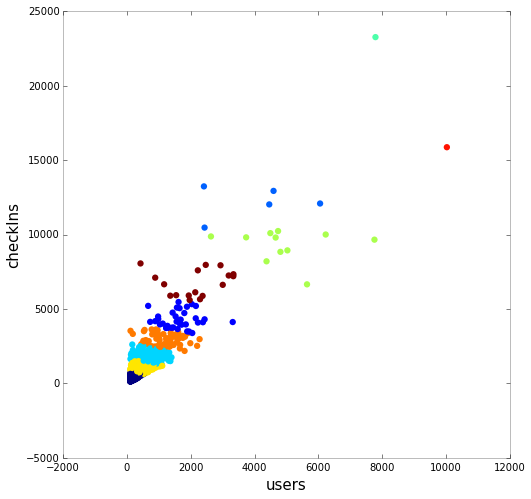

In [31]:
est_prob3=KMeans(n_clusters=10,n_init=100)
est_prob3.fit(train)
labels=est_prob3.labels_
plt.figure(figsize=(8,8))
plt.scatter(train.users,train.checkIns,s=40,c=labels.astype(np.float),lw=0)
plt.xlabel('users', fontsize = 15)
plt.ylabel('checkIns', fontsize = 15)
plt.grid()

In [36]:
# start with a list of empty silhouette values
s = [0]*10
# select the best k
for i in range(0,10):
    est=KMeans(n_clusters=i+2,n_init=100)
    est.fit(train)
    s[i]=silhouette_score(train, est.labels_)
    print('{0} clusters: {1}'.format(i+2,s[i]))
j=np.argmax(s) # select best k value (max avg silhouette value)    
est=KMeans(n_clusters=j+2,n_init=100)
est.fit(train)
labels=est.labels_
print('Best for {0} clusters: {1}\n'.format(j+2,silhouette_score(train, labels)))

2 clusters: 0.839116267203
3 clusters: 0.671339002412
4 clusters: 0.618007051113
5 clusters: 0.589002619664
6 clusters: 0.558821166033
7 clusters: 0.521662229848
8 clusters: 0.515674012556
9 clusters: 0.512354355111
10 clusters: 0.514836496485
11 clusters: 0.483812194654
Best for 2 clusters: 0.839116267203



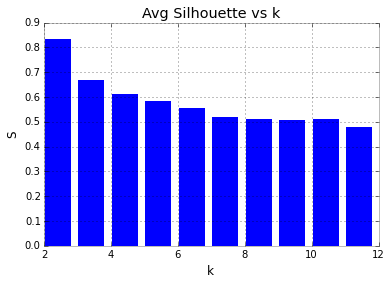

In [38]:
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')

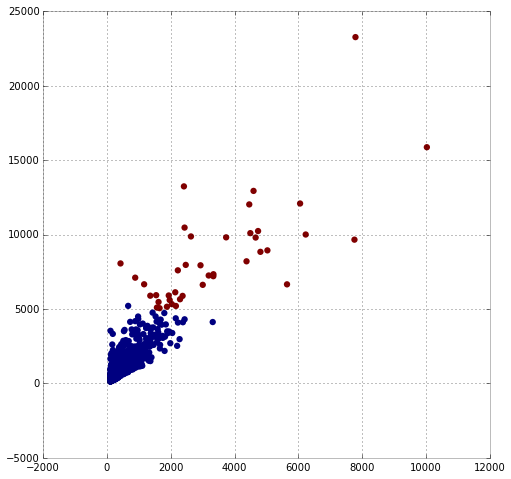

In [39]:
plt.figure(figsize=(8,8))
plt.scatter (train.users,train.checkIns,s=40,c=labels.astype(np.float),lw=0)

In [56]:
cluster1 = data3[(data3.users >= 2000) & (data3.checkIns >= 5000)]
cluster1.shape

(30, 20)

In [66]:
cluster1.describe()

,lon,lat,checkIns,tips,users,verified,price,rating,photoCount,CateValue
count,30.000000,30.000000,30.000000,30.000000,30.00000,30,30.000000,30.000000,30.000000,30.00000
mean,121.464808,31.227145,9405.200000,68.266667,4113.30000,0.3,-0.733333,6.900000,1152.400000,8.00000
std,0.024383,0.015999,3661.271886,41.683482,1969.31569,0.466092,1.014833,2.825134,1564.101077,1.83829
min,121.411822,31.180020,5204.000000,13.000000,2035.00000,False,-1.000000,-1.000000,207.000000,5.00000
25%,121.442310,31.220853,7215.750000,39.250000,2442.25000,0,-1.000000,6.775000,381.500000,6.00000
50%,121.469361,31.234236,8891.000000,61.000000,3537.50000,0,-1.000000,7.900000,678.000000,9.00000
75%,121.484709,31.238490,10203.750000,87.250000,4793.50000,1,-1.000000,8.300000,1190.250000,9.00000
max,121.503103,31.251112,23272.000000,184.000000,10032.00000,True,3.000000,9.500000,8195.000000,10.00000


In [68]:
cluster1

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description,CateValue
187,Shop & Service,Furniture / Home Store,IKEA | 宜家家居,121.429331,31.180020,7251,82,3190,2010.01.02,0_00_01_00_10,4b3f24dff964a52048a425e3,China_Shanghai,2015.11.08 22:57:30,False,-1,7.8,ikea;宜家不错,519,NaN,9
287,Shop & Service,Mall,港汇恒隆广场,121.432872,31.196687,9876,41,2633,2009.11.19,0_00_01_10_00,4b0588c4f964a5201ad922e3,China_Shanghai,2015.11.08 22:59:08,False,-1,7.0,accessories;apparel;audio visual;cafes;electro...,383,港汇恒隆广场（港汇广场66），坐落于华山路，虹桥路侧交界处，地铁一号线徐家汇站上盖，俯瞰上海...,9
288,Shop & Service,Mall,美罗城 | Metro City,121.435103,31.195265,5326,25,2035,2010.01.23,0_00_01_10_00,4b5a9103f964a520a3cb28e3,China_Shanghai,2015.11.08 22:59:08,False,-1,6.0,NaN,207,NaN,9
539,Shop & Service,Mall,凯德龙之梦 | Cloud Nine Mall,121.411822,31.220692,10471,28,2433,2010.10.01,0_00_10_01_10,4ca5669814c337049d1cb63b,China_Shanghai,2015.11.08 23:03:02,False,-1,6.7,cloud nine;cloudnine;shopping;zhongshan park;中...,248,NaN,9
718,Outdoors & Recreation,Neighborhood,田子坊 | Tian Zi Fang,121.463985,31.210012,12090,89,6056,2010.07.06,0_00_11_01_01,4c330e3366e40f473255c78b,China_Shanghai,2015.11.08 23:05:14,False,-1,-1.0,"food,entertaimant;亚文化",1449,NaN,6
767,Outdoors & Recreation,City,上海 | Shanghai,121.464300,31.223869,23272,13,7793,2011.03.30,0_00_11_01_11,4d93aa1a4f78f04d31c0e7b9,China_Shanghai,2015.11.08 23:05:43,False,-1,-1.0,2010 world expo;jing an temple;shanghai;so gre...,8195,NaN,6
1526,Travel & Transport,Hotel,"The Westin Bund Center, Shanghai",121.482441,31.234441,6624,49,3003,2009.11.19,0_01_10_10_01,4b0588bcf964a52096d622e3,China_Shanghai,2015.11.08 23:17:02,True,-1,8.4,"five star hotel, expensive",643,NaN,10
1559,Outdoors & Recreation,Pedestrian Plaza,南京路步行街 | Nanjing Road Pedestrian Street,121.476281,31.238050,10006,96,6232,2010.07.06,0_01_10_10_10,4c32e58ea0ced13a38cf156e,China_Shanghai,2015.11.08 23:17:31,False,-1,7.9,NaN,1797,NaN,6
1560,Travel & Transport,Hotel,新世界丽笙酒店 Radisson Blu Hotel,121.468428,31.236737,7204,69,3335,2009.11.19,0_01_10_10_10,4b0588bcf964a520a0d622e3,China_Shanghai,2015.11.08 23:17:32,True,-1,8.1,NaN,501,Located at the zero centre point of Shanghai,10
1561,Travel & Transport,Hotel,Le Royal Méridien Shanghai | 上海世茂皇家艾美酒店,121.471592,31.236344,9815,69,3737,2010.09.26,0_01_10_10_10,4c9f20820313370419836fd5,China_Shanghai,2015.11.08 23:17:32,True,-1,8.6,hotel;le royal meridien;le royal meridien shan...,845,Located in the heart of Shanghai along the fam...,10


In [58]:
cluster1.groupby('genCategory').agg({'CateValue': 'count',
                                  'users': 'mean',
                                  'checkIns': 'mean'})

,CateValue,checkIns,users
genCategory,,,
Nightlife Spot,4,7942.250000,3375.000000
Outdoors & Recreation,5,14180.200000,7574.800000
Professional & Other Places,3,7644.666667,4671.666667
Shop & Service,11,8505.818182,3299.545455
Travel & Transport,7,8998.285714,3102.142857


In [62]:
cluster2 = data3[(data3.users < 2000) & (data3.checkIns < 5000)]
cluster2.shape

(1025, 20)

In [65]:
cluster2.describe()

,lon,lat,checkIns,tips,users,verified,price,rating,photoCount,CateValue
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025,1025.000000,1025.000000,1025.000000,988.000000
mean,121.456932,31.222400,1062.024390,14.848780,457.869268,0.0760976,-0.965854,5.627902,87.558049,5.865385
std,0.029496,0.019461,890.965128,16.537763,366.212568,0.265284,0.347711,3.363328,104.922771,2.619600
min,121.384037,31.171116,120.000000,0.000000,100.000000,False,-1.000000,-1.000000,0.000000,1.000000
25%,121.440039,31.210721,404.000000,4.000000,183.000000,0,-1.000000,5.700000,27.000000,4.000000
50%,121.451329,31.221972,785.000000,9.000000,332.000000,0,-1.000000,6.800000,56.000000,5.000000
75%,121.475128,31.233093,1412.000000,19.000000,596.000000,0,-1.000000,7.800000,110.000000,9.000000
max,121.547499,31.316129,4757.000000,152.000000,1986.000000,True,3.000000,9.400000,1683.000000,10.000000


In [69]:
cluster2

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description,CateValue
0,Travel & Transport,Hotel,上海天禧嘉福酒店 Skyfortune Boutique Hotel,121.390842,31.183345,217,3,136,2011.09.21,0_00_00_00_10,4e79a8e88877bac8d1cbbfbd,China_Shanghai,2015.11.08 22:54:55,False,-1,-1.0,NaN,23,NaN,10
91,Shop & Service,Mall,光启城 | Sunny Days City,121.423193,31.186215,1725,4,515,2012.05.09,0_00_00_01_11,4fa9ebdbe4b0afe1f1cd2b04,China_Shanghai,2015.11.08 22:55:50,False,-1,5.5,NaN,54,NaN,9
92,Travel & Transport,Metro Station,宜山路地铁站 | Yishan Rd. Metro Stn.,121.422658,31.188354,2652,5,601,2010.02.22,0_00_00_01_11,4b82498cf964a52016cf30e3,China_Shanghai,2015.11.08 22:55:50,False,-1,-1.0,metro line 3;metro line 4;metro line 9;metro s...,47,NaN,10
94,Shop & Service,Mall,Carrefour | 家乐福,121.423305,31.186000,322,3,159,2012.08.13,0_00_00_01_11,5028928be4b004413ab8b0b1,China_Shanghai,2015.11.08 22:55:50,False,-1,5.4,NaN,15,NaN,9
100,Food,American Restaurant,Laya Burger,121.421776,31.183936,159,6,107,2012.12.16,0_00_00_01_11,50cd5eebe4b03ff341662aac,China_Shanghai,2015.11.08 22:55:51,False,-1,5.5,NaN,24,NaN,4
125,Shop & Service,Miscellaneous Shop,无印良品 | MUJI,121.422591,31.185316,185,1,106,2012.07.07,0_00_00_01_11,4ff7db61e4b036acfb1ada4b,China_Shanghai,2015.11.08 22:55:55,False,-1,-1.0,NaN,8,NaN,9
140,Travel & Transport,Hotel,上海虹桥元一希尔顿酒店 | Hilton Shanghai Hongqiao,121.390300,31.189602,1964,25,975,2011.03.13,0_00_00_10_00,4d7ca1e57498a1cd331a81fc,China_Shanghai,2015.11.08 22:56:18,True,-1,7.5,hhonors;hilton;hongqiao;hotel;shanghai;希尔顿;希尔顿酒店,135,Situated in the heart of Hongqiao business dis...,10
141,Food,Coffee Shop,星巴克 | Starbucks,121.389514,31.195838,987,3,271,2011.02.16,0_00_00_10_00,4d5bcba5e7f7548162161397,China_Shanghai,2015.11.08 22:56:18,False,-1,6.2,near huangjincheng road,121,NaN,4
142,Residence,Residential Building (Apartment / Condo),Mandarin City 名都城,121.389140,31.192269,506,1,179,2010.05.31,0_00_00_10_00,4c03d1390d0e0f47e507039a,China_Shanghai,2015.11.08 22:56:19,False,-1,-1.0,NaN,0,NaN,8
145,Travel & Transport,Hotel,上海哈一頓大酒店 Highton International Hotel Shanghai,121.392712,31.190099,311,5,142,2010.04.16,0_00_00_10_00,4bc8f6b5762beee1e2bf3d38,China_Shanghai,2015.11.08 22:56:19,False,-1,-1.0,NaN,27,NaN,10


In [70]:
cluster2.groupby('genCategory').agg({'CateValue': 'count',
                                  'users': 'mean',
                                  'checkIns': 'mean'})

,CateValue,checkIns,users
genCategory,,,
Arts & Entertainment,47,886.446809,502.468085
College & University,12,1727.666667,394.750000
Food,409,855.317848,421.625917
Nightlife Spot,114,1321.780702,580.517544
Outdoors & Recreation,48,1321.375000,570.187500
Professional & Other Places,62,1040.016129,388.016129
Residence,12,1367.250000,164.750000
Shop & Service,140,1107.442857,408.528571
Travel & Transport,144,1310.736111,497.375000


In [75]:
trainlog = np.log10(train)
trainlog.head()

,users,checkIns
CateValue,,
10,2.133539,2.336460
9,2.711807,3.236789
10,2.778874,3.423574
9,2.201397,2.507856
4,2.029384,2.201397


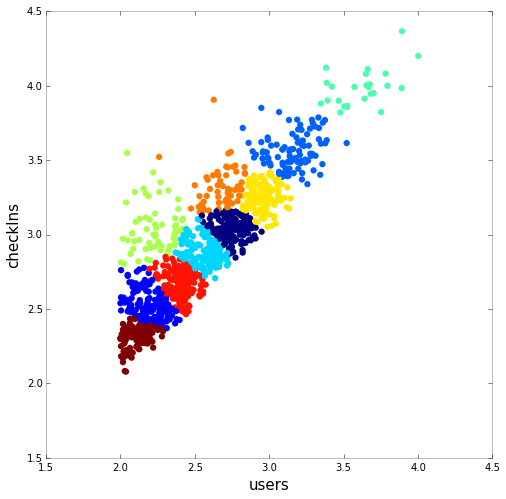

In [77]:
est_prob3=KMeans(n_clusters=10,n_init=100)
est_prob3.fit(trainlog)
labels=est_prob3.labels_
plt.figure(figsize=(8,8))
plt.scatter(trainlog.users,trainlog.checkIns,s=40,c=labels.astype(np.float),lw=0)
plt.xlabel('users', fontsize = 15)
plt.ylabel('checkIns', fontsize = 15)
plt.grid()

In [79]:
# start with a list of empty silhouette values
s = [0]*10
# select the best k
for i in range(0,10):
    est=KMeans(n_clusters=i+2,n_init=100)
    est.fit(trainlog)
    s[i]=silhouette_score(trainlog, est.labels_)
    print('{0} clusters: {1}'.format(i+2,s[i]))
j=np.argmax(s) # select best k value (max avg silhouette value)    
est=KMeans(n_clusters=j+2,n_init=100)
est.fit(trainlog)
labels=est.labels_
print('Best for {0} clusters: {1}\n'.format(j+2,silhouette_score(trainlog, labels)))

2 clusters: 0.519155260175
3 clusters: 0.46456982275
4 clusters: 0.43260960372
5 clusters: 0.408329805401
6 clusters: 0.420712482109
7 clusters: 0.420668435093
8 clusters: 0.383090739006
9 clusters: 0.380641190503
10 clusters: 0.365306650769
11 clusters: 0.374518191402
Best for 2 clusters: 0.519149074274



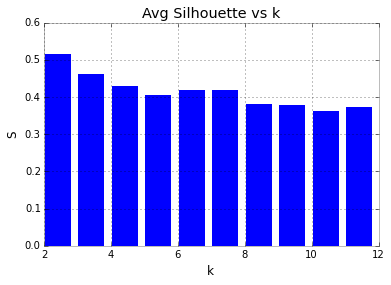

In [80]:
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')

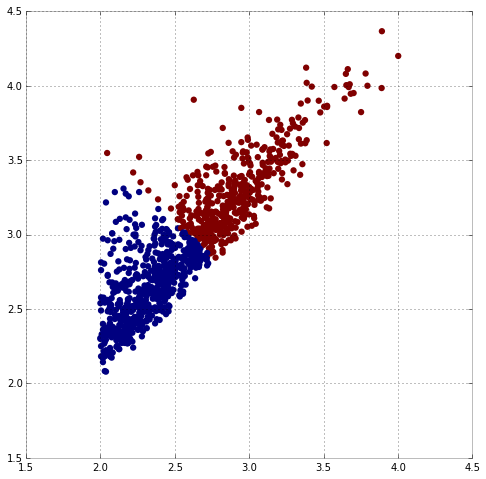

In [81]:
plt.figure(figsize=(8,8))
plt.scatter (trainlog.users,trainlog.checkIns,s=40,c=labels.astype(np.float),lw=0)

In [83]:
cluster3 = trainlog[(trainlog['users'] >= 2.8) & (trainlog['checkIns'] >= 3)]

In [84]:
cluster3.describe()

,users,checkIns
count,281.000000,281.000000
mean,3.068230,3.405854
std,0.230815,0.265031
min,2.801404,3.005609
25%,2.900913,3.214314
50%,2.996074,3.351410
75%,3.177825,3.553155
max,4.001388,4.366834
